In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## Task 1

In [2]:
data = pd.read_csv('GDP_Country.csv')

In [3]:
data.head()

,Country,Region,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [4]:
data.describe()

,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [5]:
data = data.iloc[:, 2:]

In [6]:
data = data.dropna()
data = data[data['GDP ($ per capita)'] > 0] 

In [7]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.001, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.theta = np.zeros(n_features + 1)
        self.errors = []

        X = np.c_[np.ones((n_samples, 1)), X]

        for _ in range(self.n_iterations):
            y_pred = np.dot(X, self.theta)
            error = y_pred - y
            self.errors.append(np.mean(error**2))
            gradient = (1/n_samples) * np.dot(X.T, error)
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return np.dot(X, self.theta)


In [10]:
lr_model = LinearRegressionGD(learning_rate=0.001, n_iterations=1000)
lr_model.fit(X_train, y_train)

In [11]:
y_pred = lr_model.predict(X_test)

In [12]:
mse = np.mean((y_test - y_pred)**2)
mae = np.mean(np.abs(y_test - y_pred))
rmse = sqrt(mse)
ssr = np.sum((y_pred - np.mean(y_test))**2)
sst = np.sum((y_test - np.mean(y_test))**2)
r2 = ssr / sst
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [13]:
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared (Adjusted R2):", adjusted_r2)

Mean Squared Error (MSE): 0.043693128935555
Mean Absolute Error (MAE): 0.19663384187549646
Root Mean Squared Error (RMSE): 0.2090290145782518
R-squared (R2): 2.0558683884316906
Adjusted R-squared (Adjusted R2): 2.5544729051911004


## Task 2

In [14]:
data = pd.read_csv('train.csv')

In [15]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
selected_features = ['LotArea', 'MasVnrArea', 'YearBuilt', 'LotFrontage', 'BsmtFinSF1', 'BsmtUnfSF', 'GrLivArea', 'OverallQual', 'TotalBsmtSF']
data[selected_features].describe()

,LotArea,MasVnrArea,YearBuilt,LotFrontage,BsmtFinSF1,BsmtUnfSF,GrLivArea,OverallQual,TotalBsmtSF
count,1460.000000,1452.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,103.685262,1971.267808,70.049958,443.639726,567.240411,1515.463699,6.099315,1057.429452
std,9981.264932,181.066207,30.202904,24.284752,456.098091,441.866955,525.480383,1.382997,438.705324
min,1300.000000,0.000000,1872.000000,21.000000,0.000000,0.000000,334.000000,1.000000,0.000000
25%,7553.500000,0.000000,1954.000000,59.000000,0.000000,223.000000,1129.500000,5.000000,795.750000
50%,9478.500000,0.000000,1973.000000,69.000000,383.500000,477.500000,1464.000000,6.000000,991.500000
75%,11601.500000,166.000000,2000.000000,80.000000,712.250000,808.000000,1776.750000,7.000000,1298.250000
max,215245.000000,1600.000000,2010.000000,313.000000,5644.000000,2336.000000,5642.000000,10.000000,6110.000000


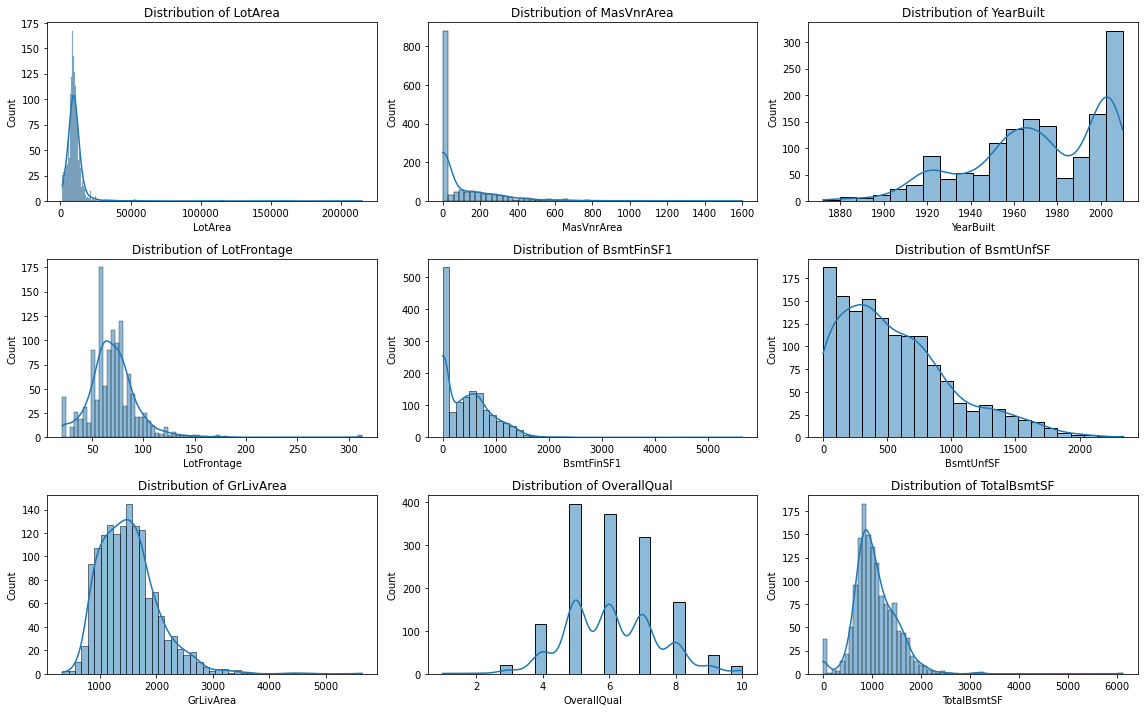

In [17]:
plt.figure(figsize=(16, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [18]:
for feature in selected_features:
    data[feature].fillna(data[feature].median(), inplace=True)

In [19]:
data['SalePrice'].fillna(data['SalePrice'].median(), inplace=True)

In [20]:
X = data[selected_features]
y = data['SalePrice']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
def ridge_regression(X, y, alpha, learning_rate, num_iterations):
    theta = np.zeros(X.shape[1])
    
    for _ in range(num_iterations):
        predictions = np.dot(X, theta)
        errors = y - predictions
        gradient = -2 * np.dot(X.T, errors) + 2 * alpha * theta
        theta -= learning_rate * gradient
        
    return theta

In [24]:
def lasso_regression(X, y, alpha, learning_rate, num_iterations):
    theta = np.zeros(X.shape[1])
    
    for _ in range(num_iterations):
        predictions = np.dot(X, theta)
        errors = y - predictions
        gradient = -2 * np.dot(X.T, errors) + alpha * np.sign(theta)
        theta -= learning_rate * gradient
        
    return theta

In [25]:
def elastic_net_regression(X, y, alpha, l1_ratio, learning_rate, num_iterations):
    theta = np.zeros(X.shape[1])
    
    for _ in range(num_iterations):
        predictions = np.dot(X, theta)
        errors = y - predictions
        gradient = -2 * np.dot(X.T, errors) + alpha * ((1 - l1_ratio) * theta + l1_ratio * np.sign(theta))
        theta -= learning_rate * gradient
        
    return theta

In [26]:
alpha = 0.01
learning_rate = 0.0001
num_iterations = 1000  

In [27]:
ridge_theta = ridge_regression(X_train_scaled, y_train, alpha, learning_rate, num_iterations)
lasso_theta = lasso_regression(X_train_scaled, y_train, alpha, learning_rate, num_iterations)
elastic_net_theta = elastic_net_regression(X_train_scaled, y_train, alpha, 0.5, learning_rate, num_iterations)

In [28]:
ridge_predictions = np.dot(X_test_scaled, ridge_theta)
lasso_predictions = np.dot(X_test_scaled, lasso_theta)
elastic_net_predictions = np.dot(X_test_scaled, elastic_net_theta)

In [29]:
def evaluate_model(predictions, y_test):
    mse = mean_squared_error(y_test, predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, rmse, mae, r2

In [30]:
ridge_metrics = evaluate_model(ridge_predictions, y_test)
lasso_metrics = evaluate_model(lasso_predictions, y_test)
elastic_net_metrics = evaluate_model(elastic_net_predictions, y_test)

In [31]:
print("Ridge Regression Metrics:")
print("MSE:", ridge_metrics[0])
print("RMSE:", ridge_metrics[1])
print("MAE:", ridge_metrics[2])
print("R-squared:", ridge_metrics[3])

Ridge Regression Metrics:
MSE: 35446464326.11387
RMSE: 188272.31428469208
MAE: 184804.5243514949
R-squared: -4.0796772787046205


In [32]:
print("\nLasso Regression Metrics:")
print("MSE:", lasso_metrics[0])
print("RMSE:", lasso_metrics[1])
print("MAE:", lasso_metrics[2])
print("R-squared:", lasso_metrics[3])


Lasso Regression Metrics:
MSE: 35446467091.119675
RMSE: 188272.32162779444
MAE: 184804.53069341753
R-squared: -4.079677674945471


In [33]:
print("\nElastic Net Regression Metrics:")
print("MSE:", elastic_net_metrics[0])
print("RMSE:", elastic_net_metrics[1])
print("MAE:", elastic_net_metrics[2])
print("R-squared:", elastic_net_metrics[3])


Elastic Net Regression Metrics:
MSE: 35446466400.137566
RMSE: 188272.31979273417
MAE: 184804.52910894176
R-squared: -4.079677575923857
